<a href="https://colab.research.google.com/github/zitouthani/Python/blob/main/XGBoost_explained.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1) Préparer l’environnement (installation + imports)**

In [25]:

# Si nécessaire, installe les bibliothèques
#!pip -q install xgboost plotly

import xgboost as xgb
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pandas as pd
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

**xgboost** → pour apprendre à l’ordinateur à
deviner.

**make_classification** → pour fabriquer un jeu de données (comme des billes rouges et bleues).

**train_test_split** → pour séparer les billes en deux groupes (apprendre et tester).

**accuracy_score** → pour savoir si l’ordinateur a bien deviné.

**pandas** → pour ranger les données dans des tableaux bien propres.

**plotly, seaborn, matplotlib** → pour faire des dessins et graphiques.

**2) Générer le dataset et afficher un aperçu**

In [26]:
# Étape 1 : Générer un jeu de données synthétique (classification binaire)
X, y = make_classification(
    n_samples=500,
    n_features=5,
    n_informative=3,
    n_redundant=0,
    random_state=42
)

**make_classification** → Il crée des données artificielles (fictives) pour un problème où il y a des classes (par exemple : 0 et 1, Rouge et bleu).

**n_samples=500** → On crée 500 billes.

**n_features=5** → Chaque bille a 5 caractéristiques (par exemple : taille, poids, couleur, forme, texture).

**n_informative=3** → Parmi ces 5 caractéristiques, 3 sont vraiment utiles pour savoir si la bille est rouge ou bleue.

**n_redundant=0** → On ne met aucune caractéristique inutile.

**random_state=42** → On donne un numéro magique pour que si on recommence, on obtienne les mêmes billes.

➡️ X = le tableau avec les caractéristiques des billes.

➡️ y = la liste qui dit si chaque bille est rouge (0) ou bleue (1).

In [27]:
# Mettre X dans un DataFrame avec des colonnes nommées
X_df = pd.DataFrame(X, columns=[f"Feature {i}" for i in range(X.shape[1])])
y_series = pd.Series(y, name="Target")

**X =** un grand tableau avec des nombres (comme une liste de billes avec leurs caractéristiques).

**Problème :** ce tableau n’a pas de noms pour ses colonnes, juste des numéros (0, 1, 2…).

**Solution :** on le met dans une boîte bien rangée (un DataFrame) avec des étiquettes :

Chaque colonne s’appelle *Feature 0*, *Feature 1*, etc.


**y_series =** une autre boîte pour les réponses (la couleur des billes), qu’on appelle Target.


➡️ **Pourquoi ?**
Parce que c’est plus joli, plus clair, et plus facile à utiliser pour faire des graphiques ou des calculs.

In [28]:
# Aperçu des données
print("Aperçu du dataset X (5 premières lignes) :")
display(X_df.head())


Aperçu du dataset X (5 premières lignes) :


,Feature 0,Feature 1,Feature 2,Feature 3,Feature 4
0,-1.830633,-0.095340,-0.654076,0.724051,-0.181319
1,0.260281,0.080151,-0.413465,-1.273314,1.482609
2,-1.379618,0.098744,-0.971657,-0.072798,-1.579555
3,-0.998061,-0.161506,1.051948,2.398537,2.120715
4,-0.369610,1.223565,0.621572,0.012779,-1.422353


In [29]:
print("\nAperçu des étiquettes y (10 premières valeurs) :")
print(y_series.head(10).to_list())


Aperçu des étiquettes y (10 premières valeurs) :
[0, 1, 1, 1, 1, 0, 0, 1, 1, 1]


**3) Split train/test et afficher les dimensions**

In [30]:
# Étape 2 : Split en train / test
X_train, X_test, y_train, y_test = train_test_split(
    X_df, y_series, test_size=0.3, random_state=42, stratify=y_series
)

print("Dimensions des ensembles :")
print(f"X_train : {X_train.shape}, X_test : {X_test.shape}")
print(f"y_train : {y_train.shape}, y_test : {y_test.shape}")

# Afficher un petit aperçu des ensembles
print("\nAperçu X_train (5 lignes) :")
display(X_train.head())
print("Aperçu y_train (10 valeurs) :")
print(y_train.head(10).to_list())


Dimensions des ensembles :
X_train : (350, 5), X_test : (150, 5)
y_train : (350,), y_test : (150,)

Aperçu X_train (5 lignes) :


,Feature 0,Feature 1,Feature 2,Feature 3,Feature 4
151,-1.748532,0.341000,0.793489,1.527792,-0.485932
289,-0.661982,-0.963737,0.189706,-1.304552,-1.447702
421,0.784604,-0.573034,2.412615,-3.120824,0.384118
53,0.104356,-0.828601,1.617213,-1.554630,-0.750190
321,0.230701,-0.542806,0.020886,-0.711965,-1.295341


Aperçu y_train (10 valeurs) :
[1, 0, 0, 0, 0, 1, 0, 1, 0, 1]


**4) Entraîner XGBoost et afficher la précision**

In [31]:
# Étape 3 : Créer et entraîner le modèle XGBoost
model = xgb.XGBClassifier(
    n_estimators=200,
    max_depth=4,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    reg_lambda=1.0,
    random_state=42,
    eval_metric='logloss'
)
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, ...)

In [32]:
# Étape 4 : Prédictions
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Exactitude (accuracy) du modèle : {accuracy:.2f}")

Exactitude (accuracy) du modèle : 0.94


**5) Comparer les prédictions vs valeurs réelles (échantillon + rapport)**

In [33]:
# Comparaison sur les 10 premières lignes de X_test
comparison_df = pd.DataFrame({
    "Réel": y_test.iloc[:10].to_list(),
    "Prédit": y_pred[:10].tolist()
})
print("Comparaison des 10 premières prédictions :")
display(comparison_df)

# Rapport de classification complet
print("Rapport de classification :")
print(classification_report(y_test, y_pred, digits=3))


Comparaison des 10 premières prédictions :


,Réel,Prédit
0,1,1
1,1,1
2,0,0
3,0,0
4,1,1
5,0,0
6,0,0
7,0,0
8,1,1
9,1,1


Rapport de classification :
              precision    recall  f1-score   support

           0      0.933     0.946     0.940        74
           1      0.947     0.934     0.940        76

    accuracy                          0.940       150
   macro avg      0.940     0.940     0.940       150
weighted avg      0.940     0.940     0.940       150



**6) Matrice de confusion (visualisation)**

Matrice de confusion :


,Classe 0 (prédit),Classe 1 (prédit)
Classe 0 (réel),70,4
Classe 1 (réel),5,71


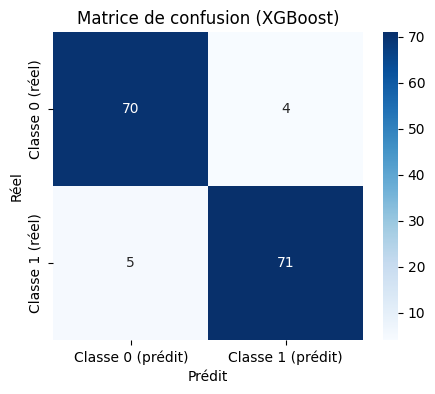

In [34]:
cm = confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(cm, index=["Classe 0 (réel)", "Classe 1 (réel)"],
                        columns=["Classe 0 (prédit)", "Classe 1 (prédit)"])

print("Matrice de confusion :")
display(cm_df)

# Heatmap avec seaborn
plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues')
plt.title("Matrice de confusion (XGBoost)")
plt.ylabel("Réel")
plt.xlabel("Prédit")
plt.show()


**70 (en haut à gauche) : Vrais Négatifs (True Negatives - TN)**

Ce sont les cas où la classe réelle était "0" (négatif) et le modèle a correctement prédit "0". Le modèle a identifié 70 cas comme étant de la Classe 0, et ils étaient effectivement de la Classe 0.

**4 (en haut à droite) : Faux Positifs (False Positives - FP)**

Ce sont les cas où la classe réelle était "0" (négatif), mais le modèle a prédit "1" (positif). Le modèle a prédit que 4 cas étaient de la Classe 1, alors qu'ils étaient en réalité de la Classe 0. C'est une erreur de "type I".

**5 (en bas à gauche) : Faux Négatifs (False Negatives - FN)**

Ce sont les cas où la classe réelle était "1" (positif), mais le modèle a prédit "0" (négatif). Le modèle a prédit que 5 cas étaient de la Classe 0, alors qu'ils étaient en réalité de la Classe 1. C'est une erreur de "type II".

**71 (en bas à droite) : Vrais Positifs (True Positives - TP)**

Ce sont les cas où la classe réelle était "1" (positif) et le modèle a correctement prédit "1". Le modèle a identifié 71 cas comme étant de la Classe 1, et ils étaient effectivement de la Classe 1.


**7) Importance des caractéristiques (table + graphique interactif)**

In [35]:
# Étape 5 : Importance des caractéristiques
importances = model.feature_importances_
importance_df = pd.DataFrame({
    "Caractéristique": X_train.columns,
    "Importance": importances
}).sort_values("Importance", ascending=False)

print("Importance des caractéristiques :")
display(importance_df)

# Graphique interactif avec Plotly
fig = px.bar(
    importance_df,
    x="Caractéristique", y="Importance",
    title="Importance des caractéristiques (XGBoost)",
    text="Importance"
)
fig.update_traces(texttemplate='%{text:.3f}', textposition='outside')
fig.update_layout(yaxis=dict(range=[0, max(importances)*1.15]))


Importance des caractéristiques :


,Caractéristique,Importance
1,Feature 1,0.557446
4,Feature 4,0.214041
3,Feature 3,0.118700
2,Feature 2,0.060069
0,Feature 0,0.049745


from matplotlib import pyplot as plt
importance_df['Importance'].plot(kind='hist', bins=20, title='Importance')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
importance_df.groupby('Caractéristique').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
importance_df['Importance'].plot(kind='line', figsize=(8, 4), title='Importance')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(importance_df['Caractéristique'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(importance_df, x='Importance', y='Caractéristique', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

**Qu'est-ce que l'importance d'une caractéristique ?**

En termes simples, c'est une mesure de la contribution de chaque caractéristique à la prédiction du modèle. Pour XGBoost, cette importance est souvent calculée en fonction du nombre de fois qu'une caractéristique est utilisée pour diviser les nœuds dans les arbres de décision, ainsi que par l'amélioration de la pureté des nœuds (gain) qu'elle apporte.

Interprétation du graphique (et du tableau) : Plus la barre est haute pour une caractéristique, plus cette caractéristique a été jugée importante par le modèle pour faire ses prédictions.

**D'après le tableau d'importance (qui est la source du graphique) :**

*   'Feature 1' est de loin la caractéristique la plus importante, avec une importance d'environ 0.557.


*   'Feature 4' vient en deuxième position avec une importance de 0.214.

*   'Feature 3' est la troisième caractéristique la plus pertinente avec 0.119.

*   'Feature 2' et 'Feature 0' sont moins importantes, avec des valeurs respectives de 0.060 et 0.050.

**Ce que cela signifie pour ces données :** Le modèle a principalement appris à distinguer les classes en se basant sur les valeurs de 'Feature 1', suivie par 'Feature 4' et 'Feature 3'. Les 'Feature 2' et 'Feature 0' ont eu un impact beaucoup plus faible sur les prédictions du modèle.

Cela peut être très utile pour comprendre quels aspects des données sont les plus pertinents pour le problème que l'on essaye de résoudre, et potentiellement pour la sélection de caractéristiques (feature selection) si on doit simplifier le modèle.

**8) Courbe ROC & AUC**

AUC : 0.969


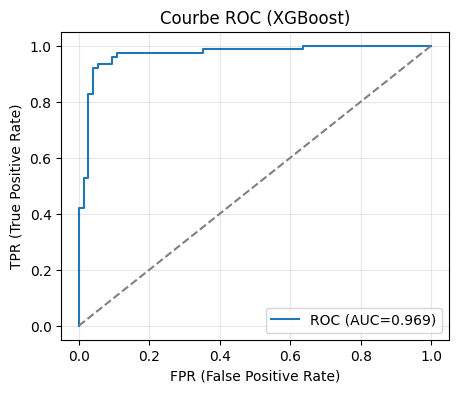

In [36]:
from sklearn.metrics import roc_auc_score, roc_curve

# Probabilités de classe positive
y_proba = model.predict_proba(X_test)[:, 1]
auc = roc_auc_score(y_test, y_proba)
print(f"AUC : {auc:.3f}")

fpr, tpr, thresholds = roc_curve(y_test, y_proba)
plt.figure(figsize=(5,4))
plt.plot(fpr, tpr, label=f'ROC (AUC={auc:.3f})')
plt.plot([0,1], [0,1], '--', color='gray')
plt.xlabel('FPR (False Positive Rate)')
plt.ylabel('TPR (True Positive Rate)')
plt.title('Courbe ROC (XGBoost)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()


La Courbe ROC (Receiver Operating Characteristic) est un outil graphique qui évalue les performances d'un modèle de classification binaire à différents seuils de discrimination. Elle trace la Taux de Vrais Positifs (TPR) (également appelé Sensibilité ou Recall) en fonction du Taux de Faux Positifs (FPR) (1 - Spécificité) pour chaque seuil de classification possible.


**Axe Y : TPR (True Positive Rate) / Taux de Vrais Positifs**

C'est la proportion d'instances positives réelles qui sont correctement identifiées comme positives par le modèle. Un TPR élevé est souhaitable.

**Axe X : FPR (False Positive Rate) / Taux de Faux Positifs**

C'est la proportion d'instances négatives réelles qui sont incorrectement identifiées comme positives par le modèle. Un FPR faible est souhaitable.

**La courbe en diagonale (ligne grise en pointillé) :**

Représente un classificateur aléatoire (qui devine au hasard). Un bon modèle devrait avoir sa courbe ROC bien au-dessus de cette ligne diagonale.

**Votre courbe ROC (ligne bleue) :**

Elle montre comment les métriques TPR et FPR varient lorsque le seuil de décision du modèle change. Plus la courbe est proche du coin supérieur gauche du graphique, meilleur est le modèle, car cela signifie qu'il a un TPR élevé pour un FPR faible.
AUC (Area Under the Curve) : 0.969

L'AUC est l'Aire Sous la Courbe ROC. C'est une métrique agrégée qui représente la capacité du modèle à distinguer les classes. Une AUC de 0.5 indique un classificateur aléatoire, tandis qu'une AUC de 1.0 indique un classificateur parfait.